In [1]:
from src.datasets import NoisySpeechDataset

In [2]:
dataset = NoisySpeechDataset(train=False, quiet=True)

In [3]:
noisy_t, clean_t = dataset[124]
noisy_arr = noisy_t.detach().numpy()
clean_arr = clean_t.detach().numpy()

In [40]:
from librosa.feature import melspectrogram
from librosa.feature.inverse import mel_to_audio

SAMPLING_RATE = 16000
HOP_MS = 16
WIN_MS = 64

def ms_to_steps(ms):
    return int((1e-3 * ms) * SAMPLING_RATE)

spec_kwargs = {
    'sr':SAMPLING_RATE,
    'n_fft':ms_to_steps(WIN_MS),
    'hop_length':ms_to_steps(HOP_MS),
    'win_length':ms_to_steps(WIN_MS),    
    'window':'hann',
    'center':True,
    'pad_mode':'reflect',
    'power':2.0,
}


def get_spec(arr):
    return melspectrogram(arr, n_mels=4 * WIN_MS, **spec_kwargs)

def get_audio(spec):
    return mel_to_audio(spec, n_iter=32, **spec_kwargs)

In [41]:
import numpy as np
import librosa
from librosa.display import specshow
import matplotlib.pyplot as plt

def plot_spec(spec):
    spec_db = librosa.power_to_db(spec, ref=np.max)
    _plot(spec_db)
    
def _plot(spec):
    plt.figure(figsize=(10, 4))
    specshow(spec, x_axis='time', y_axis='mel', sr=SAMPLING_RATE, fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

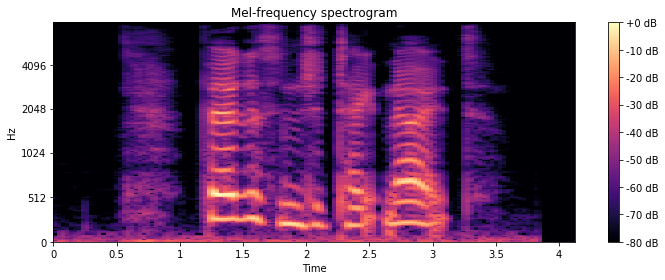

In [42]:
spec = get_spec(clean_arr)
plot_spec(spec)

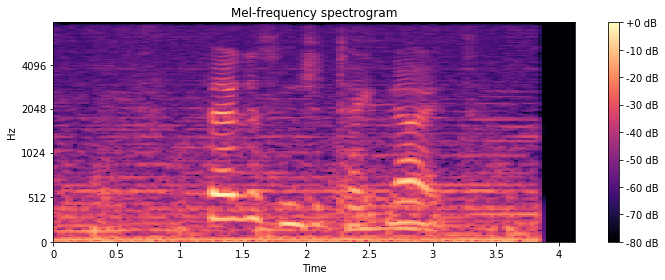

In [43]:
noise_spec = get_spec(noisy_arr)
plot_spec(noise_spec)

In [44]:
spec.shape

(256, 129)

In [45]:
from IPython.display import Audio

In [46]:
spec = get_spec(clean_arr)
log_spec = np.log(spec + 1e-10)
spec_rec = np.exp(log_spec)
Audio(get_audio(spec_rec), rate=16000)

In [47]:
Audio(get_audio(get_spec(clean_arr)), rate=16000)

In [48]:
Audio(clean_arr, rate=16000)

In [49]:
Audio(get_audio(get_spec(noisy_arr)), rate=16000)

In [50]:
Audio(noisy_arr, rate=16000)

In [51]:
def hist(spec):
    n, bins, patches = plt.hist(spec.flatten(),bins=100)
    plt.show()

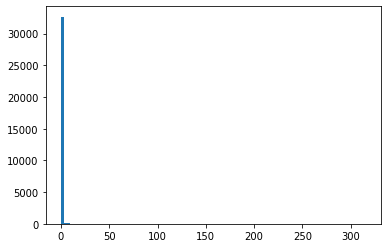

In [52]:
spec_plt = get_spec(clean_arr)
hist(spec_plt)

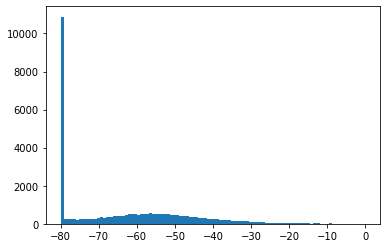

In [53]:
spec_plt = get_spec(clean_arr)
spec_plt = librosa.power_to_db(spec_plt, ref=np.max)
hist(spec_plt)

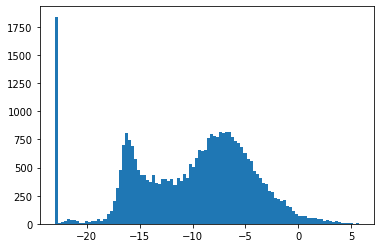

In [54]:
spec_plt = get_spec(clean_arr)
spec_plt = np.log(spec_plt + 1e-10)
hist(spec_plt)

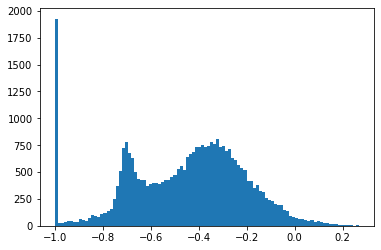

In [55]:
from librosa.util import normalize
spec_plt = get_spec(clean_arr)
spec_plt = normalize(np.log(spec_plt + 1e-10))
hist(spec_plt)

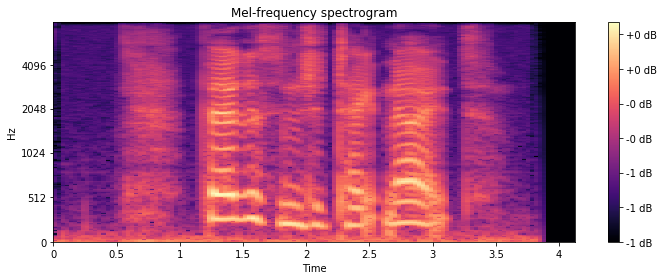

In [56]:
_plot(spec_plt)

In [57]:
# Original scipy base method
import numpy as np
from scipy import signal

SAMPLING_RATE = 16000
HOP_MS = 16
WIN_MS = 64

def ms_to_steps(ms):
    return int((1e-3 * ms) * SAMPLING_RATE)


num_segment = ms_to_steps(WIN_MS)
num_overlap = num_segment - ms_to_steps(HOP_MS)

freqs, times, spectral_frames = signal.stft(
    noisy_arr,
    fs=SAMPLING_RATE,
    nperseg=num_segment,
    noverlap=num_overlap,
    
)
print(window.shape)
print(freqs[0:5], freqs[-5:-1])
print(times[0:5], times[-5:-1])
print(spectral_frames.shape)

NameError: name 'window' is not defined

In [ ]:
# Librosa method
from librosa.core import stft

SAMPLE_RATE = 16000
HOP_MS = 16
WIN_MS = 64

def ms_to_steps(ms):
    return int((1e-3 * ms) * SAMPLE_RATE)


coeffs = stft(
    noisy_arr,
    n_fft=ms_to_steps(WIN_MS),
    hop_length=ms_to_steps(HOP_MS),
    win_length=ms_to_steps(WIN_MS),
    window='hann',
)

In [ ]:
coeffs.shape

In [36]:
coeffs

NameError: name 'coeffs' is not defined

In [37]:
spectral_frames

array([[ 9.6340021e-03+0.0000000e+00j,  1.8993624e-02+0.0000000e+00j,
         4.9227104e-03+0.0000000e+00j, ...,
         0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j],
       [-5.8015138e-03+1.8325470e-03j, -1.0478071e-02+7.5557441e-03j,
        -1.4262440e-02-2.0672634e-02j, ...,
         0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j],
       [ 9.4781946e-03+1.3777406e-03j, -6.4090700e-03-1.7135359e-02j,
         6.7728017e-03+1.3172867e-02j, ...,
         0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j],
       ...,
       [ 2.0833404e-05-3.2259564e-07j, -1.0328028e-05+1.5852397e-07j,
         3.5558967e-09+5.0656596e-10j, ...,
         0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
         0.0000000e+00+0.0000000e+00j],
       [-2.0815938e-05+1.6139296e-07j,  8.2806551e-08+1.0332552e-05j,
         4.0418651e-09